##  EX.1 Conv2 NN 

In [2]:
import numpy as np

def convolve_2d(image, filter_kernel):
    """
    Performs a valid 2D convolution between an image and a filter.
    """
    h_img, w_img = image.shape
    h_filter, w_filter = filter_kernel.shape
    
    # Calculate output dimensions (n - f + 1)
    h_out = h_img - h_filter + 1
    w_out = w_img - w_filter + 1
    
    output = np.zeros((h_out, w_out))
    
    # Slide the filter over the image
    for i in range(h_out):
        for j in range(w_out):
            # Extract the region of interest (ROI)
            region = image[i:i+h_filter, j:j+w_filter]
            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(region * filter_kernel)
            
    return output

# ==========================================
# Example 1: The Specific Calculation (Math Check)
# ==========================================
print("--- Example 1: Specific Math Check ---")
# The 6x6 input matrix from the video/text
input_matrix = np.array([
    [3, 0, 1, 2, 7, 4],
    [1, 5, 8, 9, 3, 1],
    [2, 7, 2, 5, 1, 3],
    [0, 1, 3, 1, 7, 8],
    [4, 2, 1, 6, 2, 8],
    [2, 4, 5, 2, 3, 9]
])

# The Vertical Edge Filter (3x3)
vertical_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

result_1 = convolve_2d(input_matrix, vertical_filter)

print("Input (Top-Left 3x3 subset):")
print(input_matrix[:3, :3])
print("\nFilter:")
print(vertical_filter)
print("\nCalculation for first pixel: (3*1 + 0*0 + 1*-1) + (1*1 + 5*0 + 8*-1) + (2*1 + 7*0 + 2*-1)")
print(f"Expected Result: -5")
print(f"Actual Computed Result (Top-Left pixel): {result_1[0,0]}")
print("\nFull Output Matrix (4x4):")
print(result_1)


# ==========================================
# Example 2: Vertical Edge Detection Intuition
# ==========================================
print("\n\n--- Example 2: Vertical Edge Detection (10s and 0s) ---")
# Create 6x6 image: Left half 10, Right half 0
image_vertical = np.zeros((6, 6))
image_vertical[:, :3] = 10

print("Input Image (Simplified):")
print(image_vertical)

# Apply the same vertical filter
result_vertical = convolve_2d(image_vertical, vertical_filter)

print("\nOutput (Detecting the vertical edge in the center):")
print(result_vertical)
# You will see '30's in the middle, indicating a strong positive vertical edge.


# ==========================================
# Example 3: Horizontal Edge Detection
# ==========================================
print("\n\n--- Example 3: Horizontal Edge Detection ---")
# Create 6x6 image: Top half 10, Bottom half 0
image_horizontal = np.zeros((6, 6))
image_horizontal[:3, :] = 10

# Create Horizontal Filter (Rotated 90 degrees)
horizontal_filter = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

print("Input Image (Horizontal Split):")
print(image_horizontal)
print("\nHorizontal Filter:")
print(horizontal_filter)

# Apply horizontal filter
result_horizontal = convolve_2d(image_horizontal, horizontal_filter)

print("\nOutput (Detecting the horizontal edge):")
print(result_horizontal)

--- Example 1: Specific Math Check ---
Input (Top-Left 3x3 subset):
[[3 0 1]
 [1 5 8]
 [2 7 2]]

Filter:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Calculation for first pixel: (3*1 + 0*0 + 1*-1) + (1*1 + 5*0 + 8*-1) + (2*1 + 7*0 + 2*-1)
Expected Result: -5
Actual Computed Result (Top-Left pixel): -5.0

Full Output Matrix (4x4):
[[ -5.  -4.   0.   8.]
 [-10.  -2.   2.   3.]
 [  0.  -2.  -4.  -7.]
 [ -3.  -2.  -3. -16.]]


--- Example 2: Vertical Edge Detection (10s and 0s) ---
Input Image (Simplified):
[[10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]]

Output (Detecting the vertical edge in the center):
[[ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]]


--- Example 3: Horizontal Edge Detection ---
Input Image (Horizontal Split):
[[10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.

## EX.2 Padding

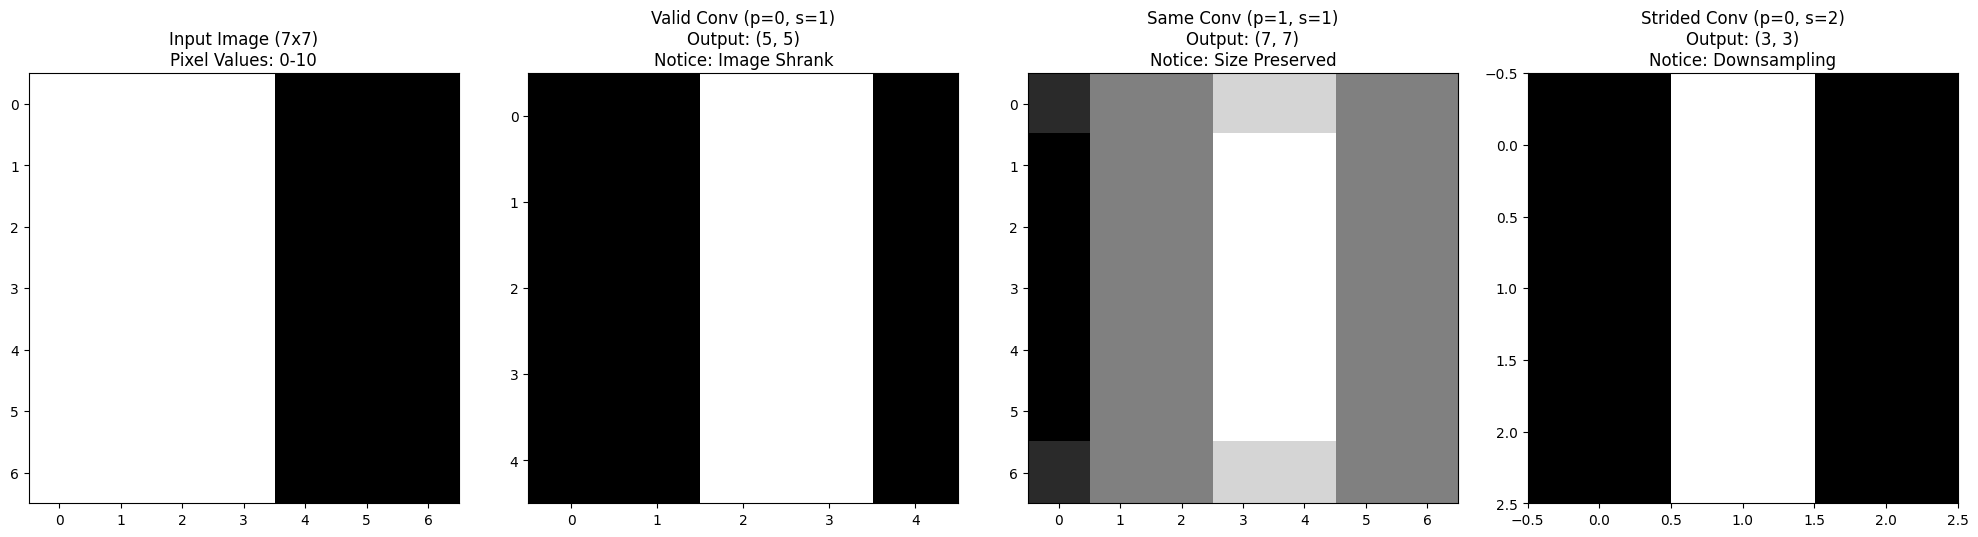

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def convolve_with_padding_stride(image, kernel, padding=0, stride=1):
    """
    Performs 2D convolution with specified padding and stride.
    
    Args:
        image (np.array): Input 2D image (H x W)
        kernel (np.array): Filter matrix (f x f)
        padding (int): Number of zero-padding layers
        stride (int): Step size for the filter
        
    Returns:
        output (np.array): Convolved feature map
    """
    # 1. Add Padding
    # Pad input with zeros around the height and width
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    
    # Get dimensions
    (n_H_prev, n_W_prev) = image.shape
    (f, f) = kernel.shape
    
    # 2. Calculate Output Dimensions
    # Formula: floor((n + 2p - f) / s) + 1
    n_H = int((n_H_prev + 2 * padding - f) / stride) + 1
    n_W = int((n_W_prev + 2 * padding - f) / stride) + 1
    
    # Initialize output
    output = np.zeros((n_H, n_W))
    
    # 3. Apply Convolution (Sliding Window)
    for h in range(n_H):            # Loop over vertical axis
        for w in range(n_W):        # Loop over horizontal axis
            # Determine the slice of the padded image
            vert_start = h * stride
            vert_end = vert_start + f
            horiz_start = w * stride
            horiz_end = horiz_start + f
            
            # Extract region of interest
            roi = image_padded[vert_start:vert_end, horiz_start:horiz_end]
            
            # Element-wise multiply and sum
            output[h, w] = np.sum(roi * kernel)
            
    return output

# --- VISUALIZATION SETUP ---

# 1. Create a 7x7 Image with a Vertical Edge (Bright Left, Dark Right)
input_image = np.zeros((7, 7))
input_image[:, :4] = 10  # Left side bright (10)
input_image[:, 4:] = 0   # Right side dark (0)

# 2. Define Vertical Edge Filter (3x3)
vertical_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# --- EXPERIMENTS ---

# Experiment A: Basic Convolution (No Pad, Stride 1) - "Valid"
# Input: 7x7 -> Output: 5x5 (Shrinks)
output_valid = convolve_with_padding_stride(input_image, vertical_filter, padding=0, stride=1)

# Experiment B: "Same" Convolution (Pad 1, Stride 1)
# Input: 7x7 -> Output: 7x7 (Preserves Size)
output_same = convolve_with_padding_stride(input_image, vertical_filter, padding=1, stride=1)

# Experiment C: Strided Convolution (Pad 0, Stride 2)
# Input: 7x7 -> Output: 3x3 (Downsamples)
output_strided = convolve_with_padding_stride(input_image, vertical_filter, padding=0, stride=2)

# --- PLOTTING ---

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Plot Input
ax[0].imshow(input_image, cmap='gray')
ax[0].set_title(f"Input Image (7x7)\nPixel Values: 0-10")

# Plot Valid (Shrinks)
ax[1].imshow(output_valid, cmap='gray')
ax[1].set_title(f"Valid Conv (p=0, s=1)\nOutput: {output_valid.shape}\nNotice: Image Shrank")

# Plot Same (Preserves)
ax[2].imshow(output_same, cmap='gray')
ax[2].set_title(f"Same Conv (p=1, s=1)\nOutput: {output_same.shape}\nNotice: Size Preserved")

# Plot Strided (Shrinks Rapidly)
ax[3].imshow(output_strided, cmap='gray')
ax[3].set_title(f"Strided Conv (p=0, s=2)\nOutput: {output_strided.shape}\nNotice: Downsampling")

plt.tight_layout()
plt.show()

## EX3 CONV WITH STRIDE

Input Shape: (7, 7)
Filter Shape: (3, 3)
Output Shape (Stride=1): (5, 5)
Output Shape (Stride=2): (3, 3) <-- Downsampled


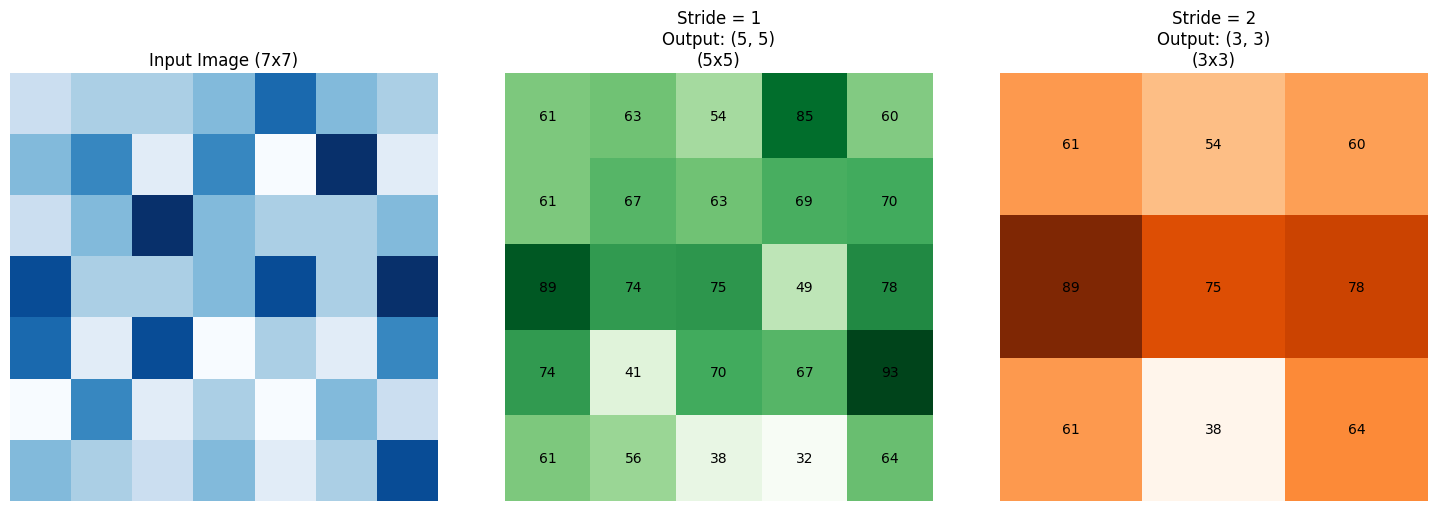

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def convolve_with_stride(image, kernel, stride=1, padding=0):
    """
    Performs 2D convolution with explicit stride and padding.
    """
    # Pad the image
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    
    (n_H, n_W) = image.shape
    (f, f) = kernel.shape
    
    # Calculate Output Dimensions using the Formula
    # floor((n + 2p - f) / s) + 1
    new_H = int(np.floor((n_H + 2*padding - f) / stride) + 1)
    new_W = int(np.floor((n_W + 2*padding - f) / stride) + 1)
    
    output = np.zeros((new_H, new_W))
    
    # Convolution Loop
    for h in range(new_H):
        for w in range(new_W):
            # Calculate corners on the padded image
            # Note the multiplication by 'stride' here
            vert_start = h * stride
            vert_end = vert_start + f
            horiz_start = w * stride
            horiz_end = horiz_start + f
            
            # Slice and Convolve
            slice_img = image_padded[vert_start:vert_end, horiz_start:horiz_end]
            output[h, w] = np.sum(slice_img * kernel)
            
    return output

# --- SETUP: The 7x7 Example from the Transcript ---
# Input: 7x7 Image
input_img = np.array([
    [2, 3, 3, 4, 7, 4, 3],
    [4, 6, 1, 6, 0, 9, 1],
    [2, 4, 9, 4, 3, 3, 4],
    [8, 3, 3, 4, 8, 3, 9],
    [7, 1, 8, 0, 3, 1, 6],
    [0, 6, 1, 3, 0, 4, 2],
    [4, 3, 2, 4, 1, 3, 8] 
])

# Filter: 3x3
filter_kernel = np.array([
    [3, 4, 4],
    [1, 0, 2],
    [-1, 0, 3]
])

# --- EXPERIMENTS ---

# 1. Stride = 1 (Standard)
output_s1 = convolve_with_stride(input_img, filter_kernel, stride=1, padding=0)

# 2. Stride = 2 (The Example)
output_s2 = convolve_with_stride(input_img, filter_kernel, stride=2, padding=0)

# --- VISUALIZATION ---
print(f"Input Shape: {input_img.shape}")
print(f"Filter Shape: {filter_kernel.shape}")
print(f"Output Shape (Stride=1): {output_s1.shape}")
print(f"Output Shape (Stride=2): {output_s2.shape} <-- Downsampled")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(input_img, cmap='Blues')
ax[0].set_title(f"Input Image (7x7)")
ax[0].axis('off')

ax[1].imshow(output_s1, cmap='Greens')
ax[1].set_title(f"Stride = 1\nOutput: {output_s1.shape}\n(5x5)")
for (j,i),label in np.ndenumerate(output_s1):
    ax[1].text(i,j,int(label),ha='center',va='center')
ax[1].axis('off')

ax[2].imshow(output_s2, cmap='Oranges')
ax[2].set_title(f"Stride = 2\nOutput: {output_s2.shape}\n(3x3)")
for (j,i),label in np.ndenumerate(output_s2):
    ax[2].text(i,j,int(label),ha='center',va='center')
ax[2].axis('off')

plt.tight_layout()
plt.show()

## EX.3 CONV OVER VOLUMEN 3D

Input Shape: (6, 6, 3)
Filter Shape: (3, 3, 3)
Output Shape: (4, 4, 2) (Height x Width x Num_Filters)


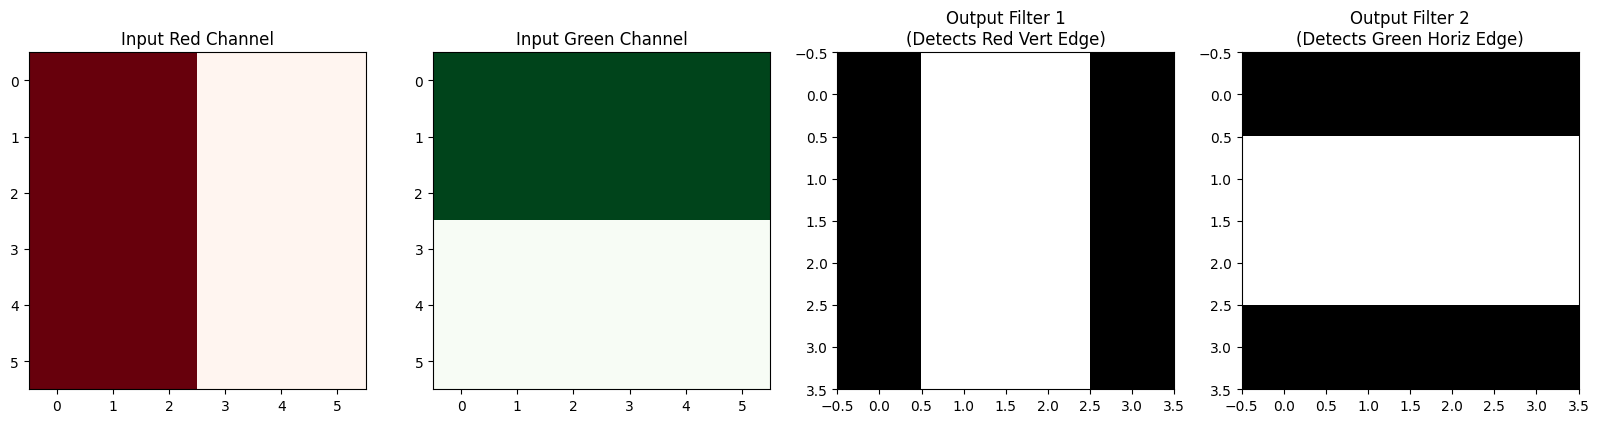

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def convolve_volume(volume, filters, stride=1, padding=0):
    """
    Performs convolution over a 3D volume using multiple 3D filters.
    
    Args:
        volume: Input RGB image (n_H, n_W, n_C)
        filters: List of filters, where each is (f, f, n_C)
        
    Returns:
        output_volume: (new_H, new_W, n_filters)
    """
    (n_H, n_W, n_C) = volume.shape
    num_filters = len(filters)
    (f, f, filter_channels) = filters[0].shape
    
    # Assert channels match
    assert n_C == filter_channels, f"Input channels ({n_C}) must match filter channels ({filter_channels})"
    
    # Calculate output dims (assuming Valid padding)
    new_H = int((n_H - f) / stride) + 1
    new_W = int((n_W - f) / stride) + 1
    
    # Initialize output volume
    output_volume = np.zeros((new_H, new_W, num_filters))
    
    # Loop over each filter
    for i, kernel in enumerate(filters):
        # Loop over spatial positions
        for h in range(new_H):
            for w in range(new_W):
                # Extract the 3D cube from input
                vert_start = h * stride
                vert_end = vert_start + f
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                slice_vol = volume[vert_start:vert_end, horiz_start:horiz_end, :]
                
                # Sum over all dimensions (Height, Width, AND Channels)
                # This squashes the 3D cube into a single scalar
                output_volume[h, w, i] = np.sum(slice_vol * kernel)
                
    return output_volume

# --- SETUP ---
# 1. Create a 6x6x3 Input Volume (RGB)
# Let's make Red channel vertical stripes, Green horizontal, Blue random
input_vol = np.zeros((6, 6, 3))
input_vol[:, :3, 0] = 10  # Red channel: Vertical Edge
input_vol[:3, :, 1] = 10  # Green channel: Horizontal Edge
input_vol[:, :, 2] = np.random.randint(0, 5, (6, 6)) # Blue: Noise

# 2. Define Filters
# Filter 1: Detects Vertical Edges in RED channel only
f1 = np.zeros((3, 3, 3))
f1[:, :, 0] = [[1, 0, -1], [1, 0, -1], [1, 0, -1]] # Look at Red
f1[:, :, 1] = np.zeros((3, 3)) # Ignore Green
f1[:, :, 2] = np.zeros((3, 3)) # Ignore Blue

# Filter 2: Detects Horizontal Edges in GREEN channel only
f2 = np.zeros((3, 3, 3))
f2[:, :, 0] = np.zeros((3, 3)) # Ignore Red
f2[:, :, 1] = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]] # Look at Green
f2[:, :, 2] = np.zeros((3, 3)) # Ignore Blue

# Run Convolution
output = convolve_volume(input_vol, [f1, f2])

# --- VISUALIZATION ---
print(f"Input Shape: {input_vol.shape}")
print(f"Filter Shape: {f1.shape}")
print(f"Output Shape: {output.shape} (Height x Width x Num_Filters)")

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(input_vol[:,:,0], cmap='Reds'); ax[0].set_title("Input Red Channel")
ax[1].imshow(input_vol[:,:,1], cmap='Greens'); ax[1].set_title("Input Green Channel")
ax[2].imshow(output[:,:,0], cmap='gray'); ax[2].set_title("Output Filter 1\n(Detects Red Vert Edge)")
ax[3].imshow(output[:,:,1], cmap='gray'); ax[3].set_title("Output Filter 2\n(Detects Green Horiz Edge)")
plt.show()